In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import joblib

import nltk 
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


import re

print("Tensorflow Version",tf.__version__)

Tensorflow Version 2.4.0


In [2]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
import itertools
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [3]:
df = pd.read_excel('dataset_NLP_Notes.xlsx')
print('前', df.shape)
df.dropna(axis=0, how='all', inplace=True)
df.reset_index(drop=True, inplace=True)
print('后', df.shape)
val_count = df.Sentiment.value_counts()

前 (2045, 3)
后 (1742, 3)


In [4]:
print(df.head(20))
print(df.isnull().sum())
print(df.isna().sum())

                                  GlobalID  \
0   {5AC8034E-5B46-4294-85F0-5B13117EBEFE}   
1   {5EAD3364-2CA7-4A39-9A53-7F9DCF5D2041}   
2   {124B9BFA-7F7B-4B8E-8A56-42E067F0F72E}   
3   {1C6D0EAB-F68D-411D-974E-1233618854CC}   
4   {7F3B6DB6-2ED4-4415-8DC2-3F03EC88F353}   
5   {A717D86F-23E9-4C8C-9F12-198A71113E93}   
6   {2138197A-F5CF-4308-93E2-62EA6F84D098}   
7   {0FAC3767-EAC4-477A-B5F0-24AF8A40BD09}   
8   {BEAC832C-0783-414A-9354-C297F38570AD}   
9   {DEF5D82B-E326-41A5-9B6C-D46DCD86950C}   
10  {AA461F47-1B2B-4EA1-8154-ECF70B55A334}   
11  {C4F44511-EA53-4FCF-9422-E1C57703720D}   
12  {89C867F1-D5ED-48C8-9586-B705F5DA9838}   
13  {81670D96-4143-47B1-A9C8-83977892D53F}   
14  {1304CF55-4FF9-490F-AF5A-5719CD110A9D}   
15  {5AD8CAF4-AB96-4BFA-8A08-6010C96937F1}   
16  {8BE98561-0104-44B6-98D2-1CB625378F9B}   
17  {BE0AD7A4-F4FD-40F7-979C-AE5F4470B1E4}   
18  {BEE96943-A647-46B0-85FA-6B02B961D195}   
19  {C9587D29-D898-4CE0-8508-E31EF42AD20C}   

                                 

Vocabulary Size : 2894
Training X Shape: (1393, 30)
Testing X Shape: (349, 30)
y_train shape: (1393, 1)
y_test shape: (349, 1)
Found 400000 word vectors.
Training on CPU...
Epoch 1/10
2/2 [==============================] - 6s 1s/step - loss: 0.6311 - accuracy: 0.9426 - val_loss: 0.3293 - val_accuracy: 0.9943
Epoch 2/10
2/2 [==============================] - 1s 191ms/step - loss: 0.2880 - accuracy: 0.9941 - val_loss: 0.0710 - val_accuracy: 0.9943
Epoch 3/10
2/2 [==============================] - 0s 185ms/step - loss: 0.0653 - accuracy: 0.9941 - val_loss: 0.0333 - val_accuracy: 0.9943
Epoch 4/10
2/2 [==============================] - 1s 190ms/step - loss: 0.0406 - accuracy: 0.9934 - val_loss: 0.0449 - val_accuracy: 0.9943
Epoch 5/10
2/2 [==============================] - 0s 197ms/step - loss: 0.0535 - accuracy: 0.9937 - val_loss: 0.0573 - val_accuracy: 0.9943
Epoch 6/10
2/2 [==============================] - 0s 182ms/step - loss: 0.0736 - accuracy: 0.9931 - val_loss: 0.0629 - val_accurac

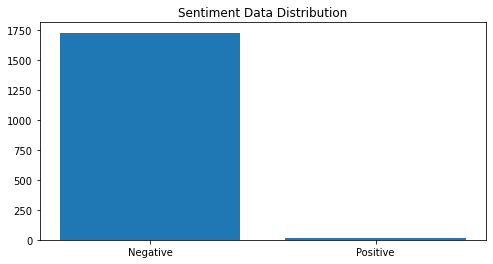

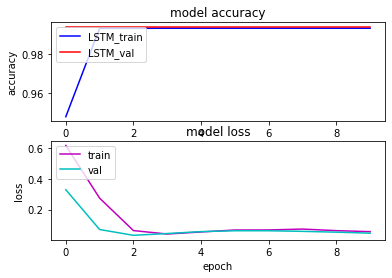

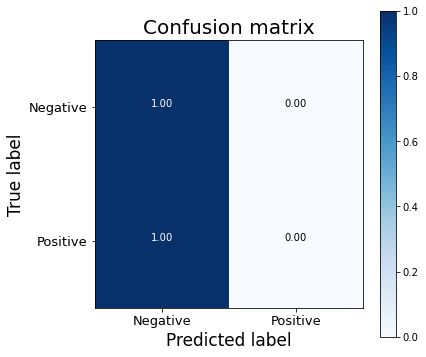

********************************************************************************
              precision    recall  f1-score   support

    Negative       0.99      1.00      1.00       347
    Positive       0.00      0.00      0.00         2

    accuracy                           0.99       349
   macro avg       0.50      0.50      0.50       349
weighted avg       0.99      0.99      0.99       349

<class 'numpy.ndarray'>
(349, 1)
[[7.64266161e-09]
 [4.10717016e-09]
 [2.75565726e-05]
 [9.56630153e-09]
 [3.96907330e-04]
 [6.21914864e-04]
 [2.56896019e-04]
 [2.90020944e-06]
 [7.29365684e-06]
 [5.91600929e-06]
 [9.87092935e-05]
 [3.45610429e-09]
 [2.71260228e-06]
 [5.55269423e-07]
 [6.75233969e-06]
 [5.74154626e-07]
 [5.24219024e-09]
 [2.11865881e-05]
 [9.93932872e-07]
 [3.50205838e-08]
 [3.49344446e-05]
 [2.14395805e-05]
 [2.61738242e-05]
 [1.46835573e-05]
 [6.25759977e-09]
 [1.31110410e-05]
 [7.73306965e-05]
 [8.12176495e-07]
 [2.30784547e-09]
 [1.33815776e-08]
 [1.39273789e-05]
 

/Users/liruizhi/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [5]:


plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("Sentiment Data Distribution")

TRAIN_SIZE = 0.8
MAX_NB_WORDS = 100000
MAX_SEQUENCE_LENGTH = 30

train_data, test_data = train_test_split(df, test_size=1-TRAIN_SIZE,
                                         random_state=7)

#from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data['Notes'])

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

#from keras.preprocessing.sequence import pad_sequences
#                                                                                   x_train  x_test
x_train = pad_sequences(tokenizer.texts_to_sequences(train_data['Notes']),
                         maxlen = MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data['Notes']),
                       maxlen = MAX_SEQUENCE_LENGTH)

#X = pad_sequences(tokenizer.texts_to_sequences(df['Notes']),
                         #maxlen = MAX_SEQUENCE_LENGTH)

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

labels = train_data.Sentiment.unique().tolist()

encoder = LabelEncoder()
encoder.fit(train_data.Sentiment.to_list())

y_train = encoder.transform(train_data.Sentiment.to_list())
y_test = encoder.transform(test_data.Sentiment.to_list())

#                                                                                   y_train  y_test
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


GLOVE_EMB = 'glove.6B.300d.txt'  # 百度云上下载的那个文件
EMBEDDING_DIM = 300
LR = 1e-3
BATCH_SIZE = 1024
EPOCHS = 10
MODEL_PATH = 'best_model.hdf5'

embeddings_index = {}

f = open(GLOVE_EMB)
for line in f:
    values = line.split()
    word = value = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' %len(embeddings_index))

embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
        
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          EMBEDDING_DIM,
                                          weights=[embedding_matrix],
                                          input_length=MAX_SEQUENCE_LENGTH,
                                          trainable=False)
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(sequence_input, outputs)

model.compile(optimizer=Adam(learning_rate=LR), loss='binary_crossentropy',
              metrics=['accuracy'])
ReduceLROnPlateau = ReduceLROnPlateau(factor=0.1,
                                     min_lr = 0.01,
                                     monitor = 'val_loss',
                                     verbose = 1)

print("Training on GPU...") if tf.config.list_physical_devices('GPU') else print("Training on CPU...")

history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
                    validation_data=(x_test, y_test), callbacks=[ReduceLROnPlateau])





s, (at, al) = plt.subplots(2,1)

at.plot(history.history['accuracy'], c= 'b')
at.plot(history.history['val_accuracy'], c='r')
at.set_title('model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['LSTM_train', 'LSTM_val'], loc='upper left')

al.plot(history.history['loss'], c='m')
al.plot(history.history['val_loss'], c='c')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train', 'val'], loc = 'upper left')





#                                                                                        prediction

scores = model.predict(x_test, verbose=1, batch_size=10000)

def decode_sentiment(score):
    return "Positive" if score>0.5 else "Negative"

y_pred_1d = [decode_sentiment(score) for score in scores]


def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=13)
    plt.yticks(tick_marks, classes, fontsize=13)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=17)
    plt.xlabel('Predicted label', fontsize=17)


cnf_matrix = confusion_matrix(test_data.Sentiment.to_list(), y_pred_1d)
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, classes=test_data.Sentiment.unique(), title="Confusion matrix")
plt.show()

print('*' * 80)
print(classification_report(list(test_data.Sentiment), y_pred_1d))
print(type(scores))
print(scores.shape)
#result = pd.DataFrame(scores)
#result.columns = ['Notes_possibility']
#final = pd.concat([df, result], axis=1)
#final.to_excel('Notes_final.xlsx')
print(scores)
print(y_pred_1d)

In [ ]:
result = pd.DataFrame(scores)

In [2]:
aaa = pd.read_excel('Lab_final.xlsx')

In [4]:
aaa.loc[100:121,:]

,GlobalID,Lab Comments,Sentiment,Lab_possibility
100,{72644655-4CED-47F3-8650-769E8E7ABAFB},"That's a yellowjacket, not Asian giant hornet.",Negative,3.218606e-07
101,{F0642335-3D11-4537-9A87-BD1A7EAE7C7E},"This is not a honeybee, but a native bumblebee...",Negative,7.119075e-08
102,{C89B4D6D-B885-4ED6-894A-365613131EFC},"This is a bald-faced hornet, Dolichovespula ma...",Negative,2.340472e-07
103,{9D87F6E9-922C-4DCC-9E5E-10AA7D9BE1ED},"This is a bald faced hornet, Dolichovespula ma...",Negative,2.340472e-07
104,{0208D9EC-9652-4DFB-9313-8C25A534BB3B},This is a Jerusalem cricket -,Negative,1.067711e-06
105,{EBE1A357-9859-4402-A0C5-18A1B42DF0BD},You are correct! Nice close up.,Negative,4.499735e-06
106,{B823066B-82C1-4C49-BC4E-4CF626DD5A7E},To yellow and small to be AGH. This is probabl...,Negative,2.996525e-07
107,{5EA48A41-49D1-49CE-8608-565258D71F96},"It's not possible to identify from the pic, bu...",Negative,1.313400e-07
108,{2BB2424F-4C49-445C-BB58-B9C21EA77B00},You've got a beautiful bumble bee!,Negative,4.693476e-07
109,{82ECA218-CD3B-4E45-A587-84162C61A7E9},What a beauty! That's a yellow jacket.,Negative,6.011038e-07
